# Time Series Analysis & Visualization in Python

Time series data is information collected in sequence over time. It shows how things change at different points, like stock prices every day or temperature every hour.

* It is used in industries such as finance, pharmaceuticals, social media, and research.
* Analyzing and visualizing this data helps us find trends, seasonal patterns, and behaviors.
* These insights support forecasting and guide better decision-making.
* The main goal is to study data in time order to extract meaningful patterns and predictions

### Concepts in Time Series Analysis

* Trend: It represents the general direction in which a time series is moving over an extended period. It checks whether the values are increasing, decreasing or staying relatively constant.
* Seasonality: Seasonality refers to repetitive patterns or cycles that occur at regular intervals within a time series corresponding to specific time units like days, weeks, months or seasons.
* Moving average: It is used to smooth out short-term fluctuations and highlight longer-term trends or patterns in the data.
* Noise: It represents the irregular and unpredictable components in a time series that do not follow a pattern.
* Differencing: It is used to make the difference in values of a specified interval. By default it’s 1 but we can specify different values for plots.
* Stationarity: A stationary time series is statistical properties such as mean, variance and autocorrelation remain constant over time.
* Order: The order of differencing refers to the number of times the time series data needs to be differenced to achieve stationarity.
* Autocorrelation: Autocorrelation is a statistical method used in time series analysis to quantify the degree of similarity between a time series and a lagged version of itself.
* Resampling: Resampling is a technique in time series analysis that is used for changing the frequency of the data observations.

### Types of Time Series Data

Time series data can be classified into two sections:

* Continuous Time Series: Data recorded at regular intervals with a continuous range of values like temperature, stock prices, Sensor Data, etc.
* Discrete Time Series: Data with distinct values or categories recorded at specific time points like counts of events, categorical statuses, etc.

## Practical Time Series Visualization with Python

## Step 1: Installing and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

## Step 2: Loading the Dataset

In [2]:
dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/stock_data.csv"
df = pd.read_csv(dataset, parse_dates=True, index_col='Date')

In [3]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
df.shape

(3019, 7)

## Step 3: Cleaning of Data

In [5]:
df.isnull().sum()

Unnamed: 0    3019
Open             0
High             0
Low              0
Close            0
Volume           0
Name             0
dtype: int64

In [6]:
df.drop("Unnamed: 0", inplace=True, axis=1)     

In [7]:
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


In [8]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Step 4: Plotting High Stock Prices

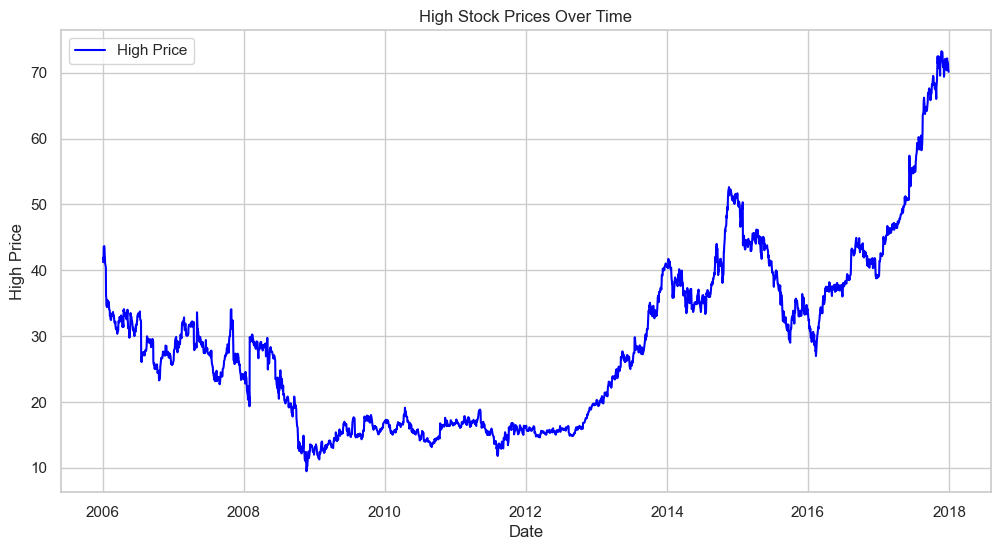

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y='High', color='blue', label='High Price')
plt.title('High Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

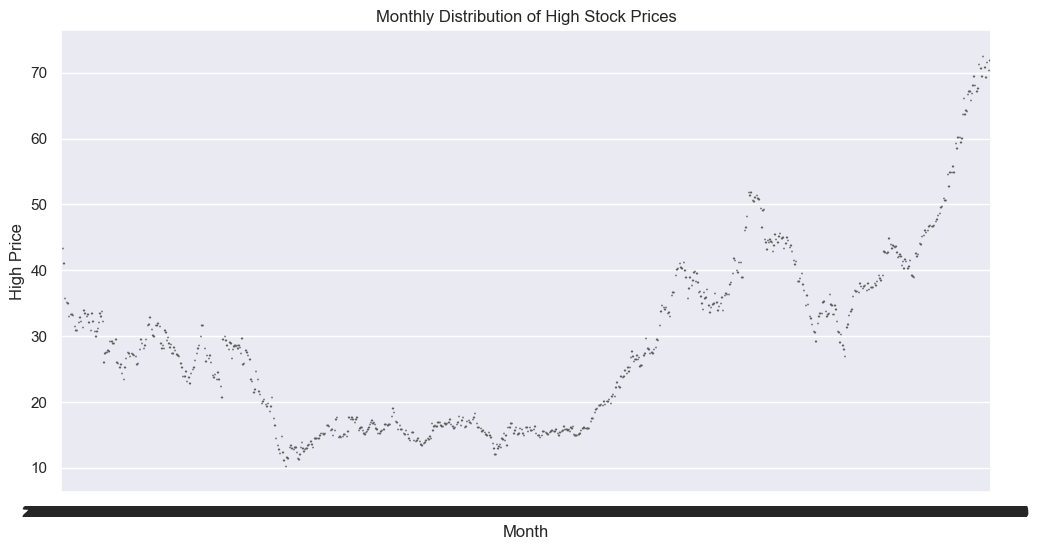

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Date', y='High', palette='Set3', hue='Date')
plt.title('Monthly Distribution of High Stock Prices')
plt.xlabel('Month')
plt.ylabel('High Price')
plt.show()

## Step 5: Resampling Data

To better understand the trend of the data we will use the resampling method which provide a clearer view of trends and patterns when we are dealing with daily data.

* df_resampled = df.resample('M').mean(numeric_only=True): Resamples data to monthly frequency and calculates the mean of all numeric columns for each month.

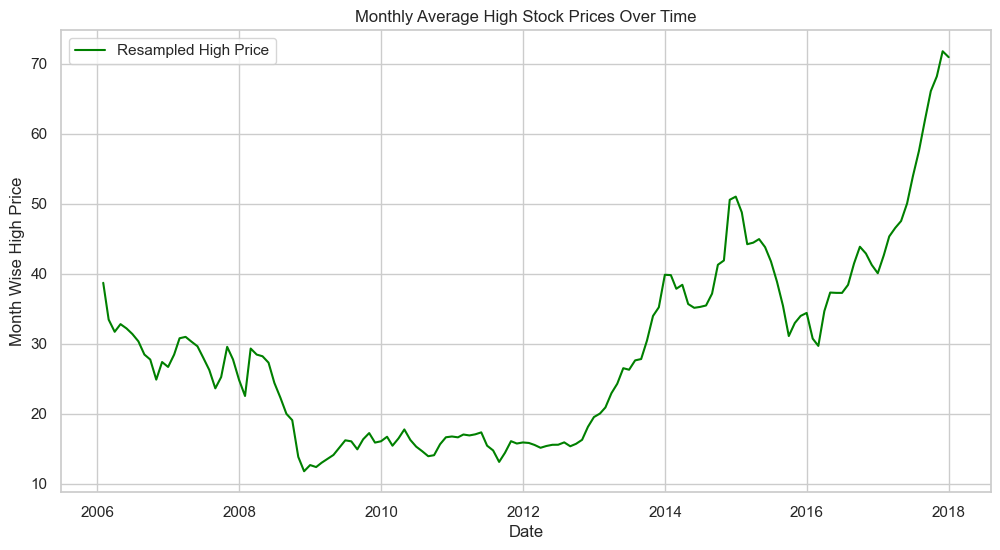

In [19]:
df_resampled = df.resample('M').mean(numeric_only=True)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', color='green', label='Resampled High Price')
plt.title('Monthly Average High Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Month Wise High Price')
plt.show()  

## Step 6: Detecting Seasonality with Autocorrelation

We will detect Seasonality using the autocorrelation function (ACF) plot. Peaks at regular intervals in the ACF plot suggest the presence of seasonality.

Date column is already set as index.


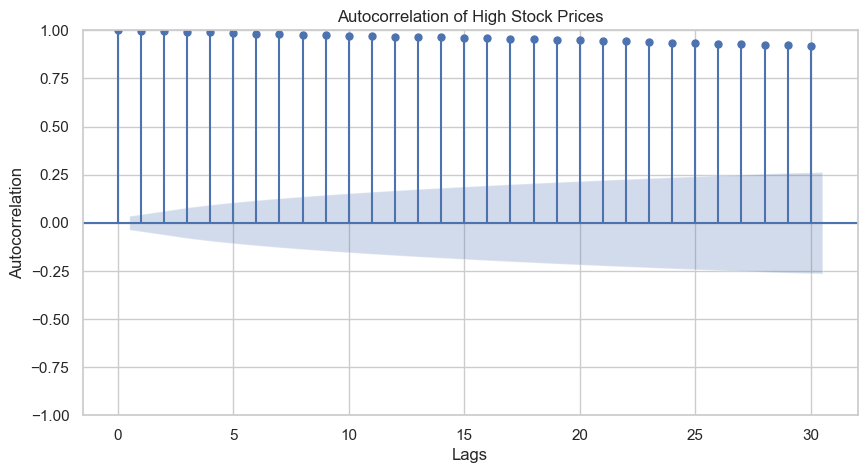

In [20]:
if 'Date' not in df.columns:
    print("Date column is already set as index.")
else:
    df.set_index('Date', inplace=True)

plt.figure(figsize=(10, 5))
plot_acf(df['High'], lags=30, ax=plt.gca())
plt.title('Autocorrelation of High Stock Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

## Step 7: Testing Stationarity with ADF test

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.767140488053594
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {:.3f}'.format(key, value))
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")
    

ADF Statistic: 0.767140488053594
p-value: 0.9910868050318213
Critical Value (1%): -3.433
Critical Value (5%): -2.863
Critical Value (10%): -2.567
The time series is non-stationary.


## Step 8: Differencing to Achieve Stationarity

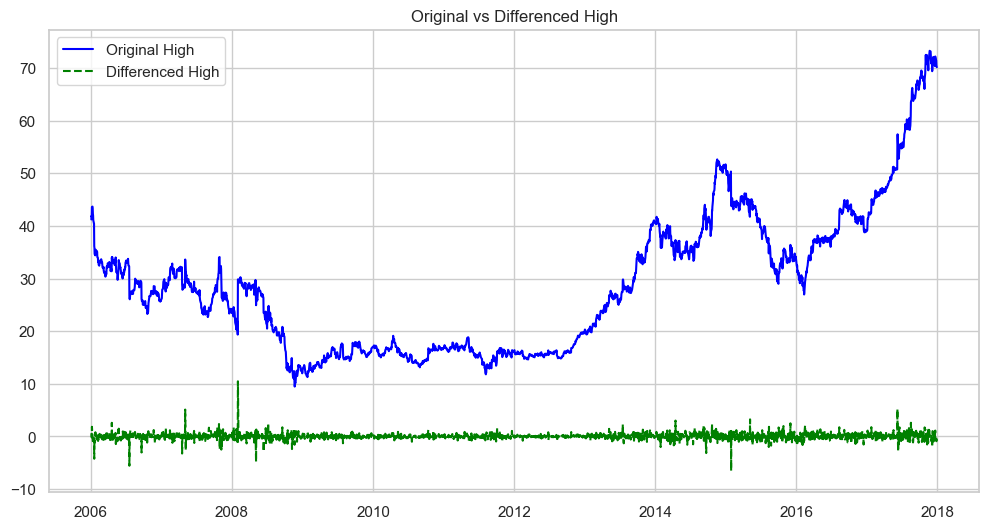

In [25]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

## Step 9: Smoothing Data with Moving Average

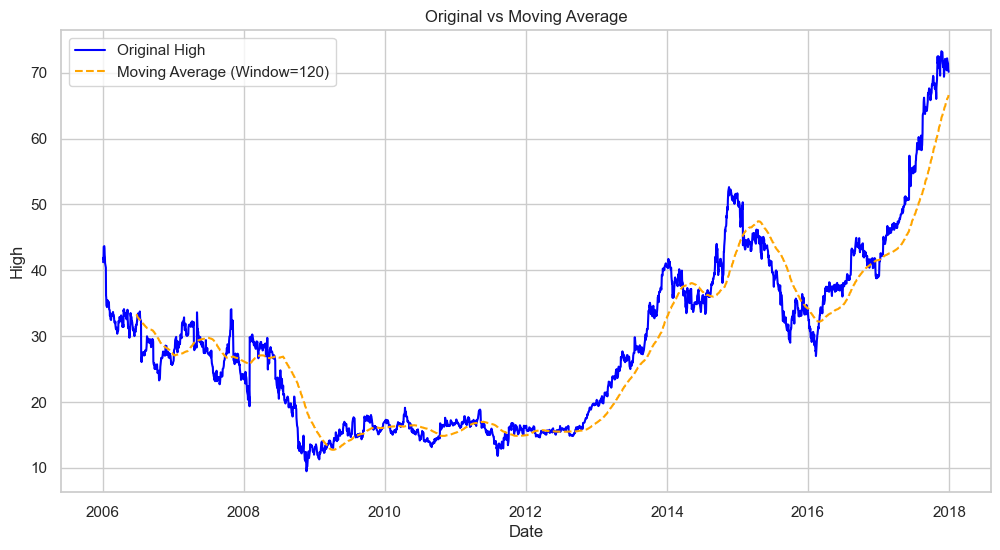

In [26]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

## Step 10: Original Data Vs Differenced Data

In [27]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [28]:
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64

In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -12.148367478343248
p-value: 1.591276613414881e-22
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


Based on the ADF Statistic we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis.